In [327]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import seaborn as sns
%matplotlib inline  
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import scipy.stats as st
from sklearn.metrics import classification_report
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [329]:
df = pd.read_csv("C:/Users/Owen/Downloads/data (1).csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [331]:
df.diagnosis.value_counts() #ini Target

diagnosis
B    357
M    212
Name: count, dtype: int64

In [333]:
df.drop(columns=['Unnamed: 32','id', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],axis=1,inplace=True)

In [335]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    object 
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   smoothness_mean         569 non-null    float64
 6   compactness_mean        569 non-null    float64
 7   concavity_mean          569 non-null    float64
 8   concave points_mean     569 non-null    float64
 9   symmetry_mean           569 non-null    float64
 10  fractal_dimension_mean  569 non-null    float64
 11  radius_se               569 non-null    float64
 12  texture_se              569 non-null    float64
 13  perimeter_se            569 non-null    float64
dtypes: float64(13), object(1)
memory usage: 62

In [337]:
df.duplicated().value_counts()

False    569
Name: count, dtype: int64

In [339]:
X = [var for var in df.columns if df[var].dtypes != 'O']

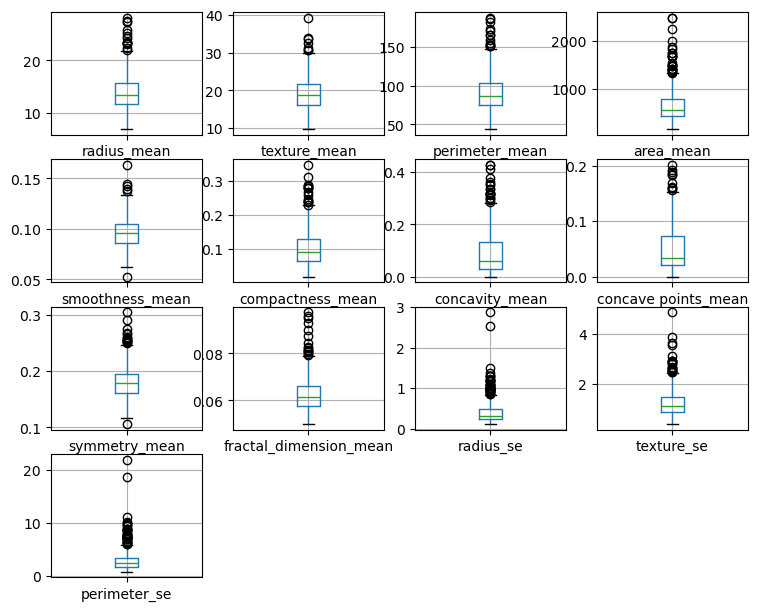

In [341]:
plt.figure(figsize=[9,15])
n=0
for i in X :
    n = n+1
    plt.subplot(8,4,n)
    fig = df.boxplot(i)
    fig.set_xlabel('')
    fig.set_ylabel('')

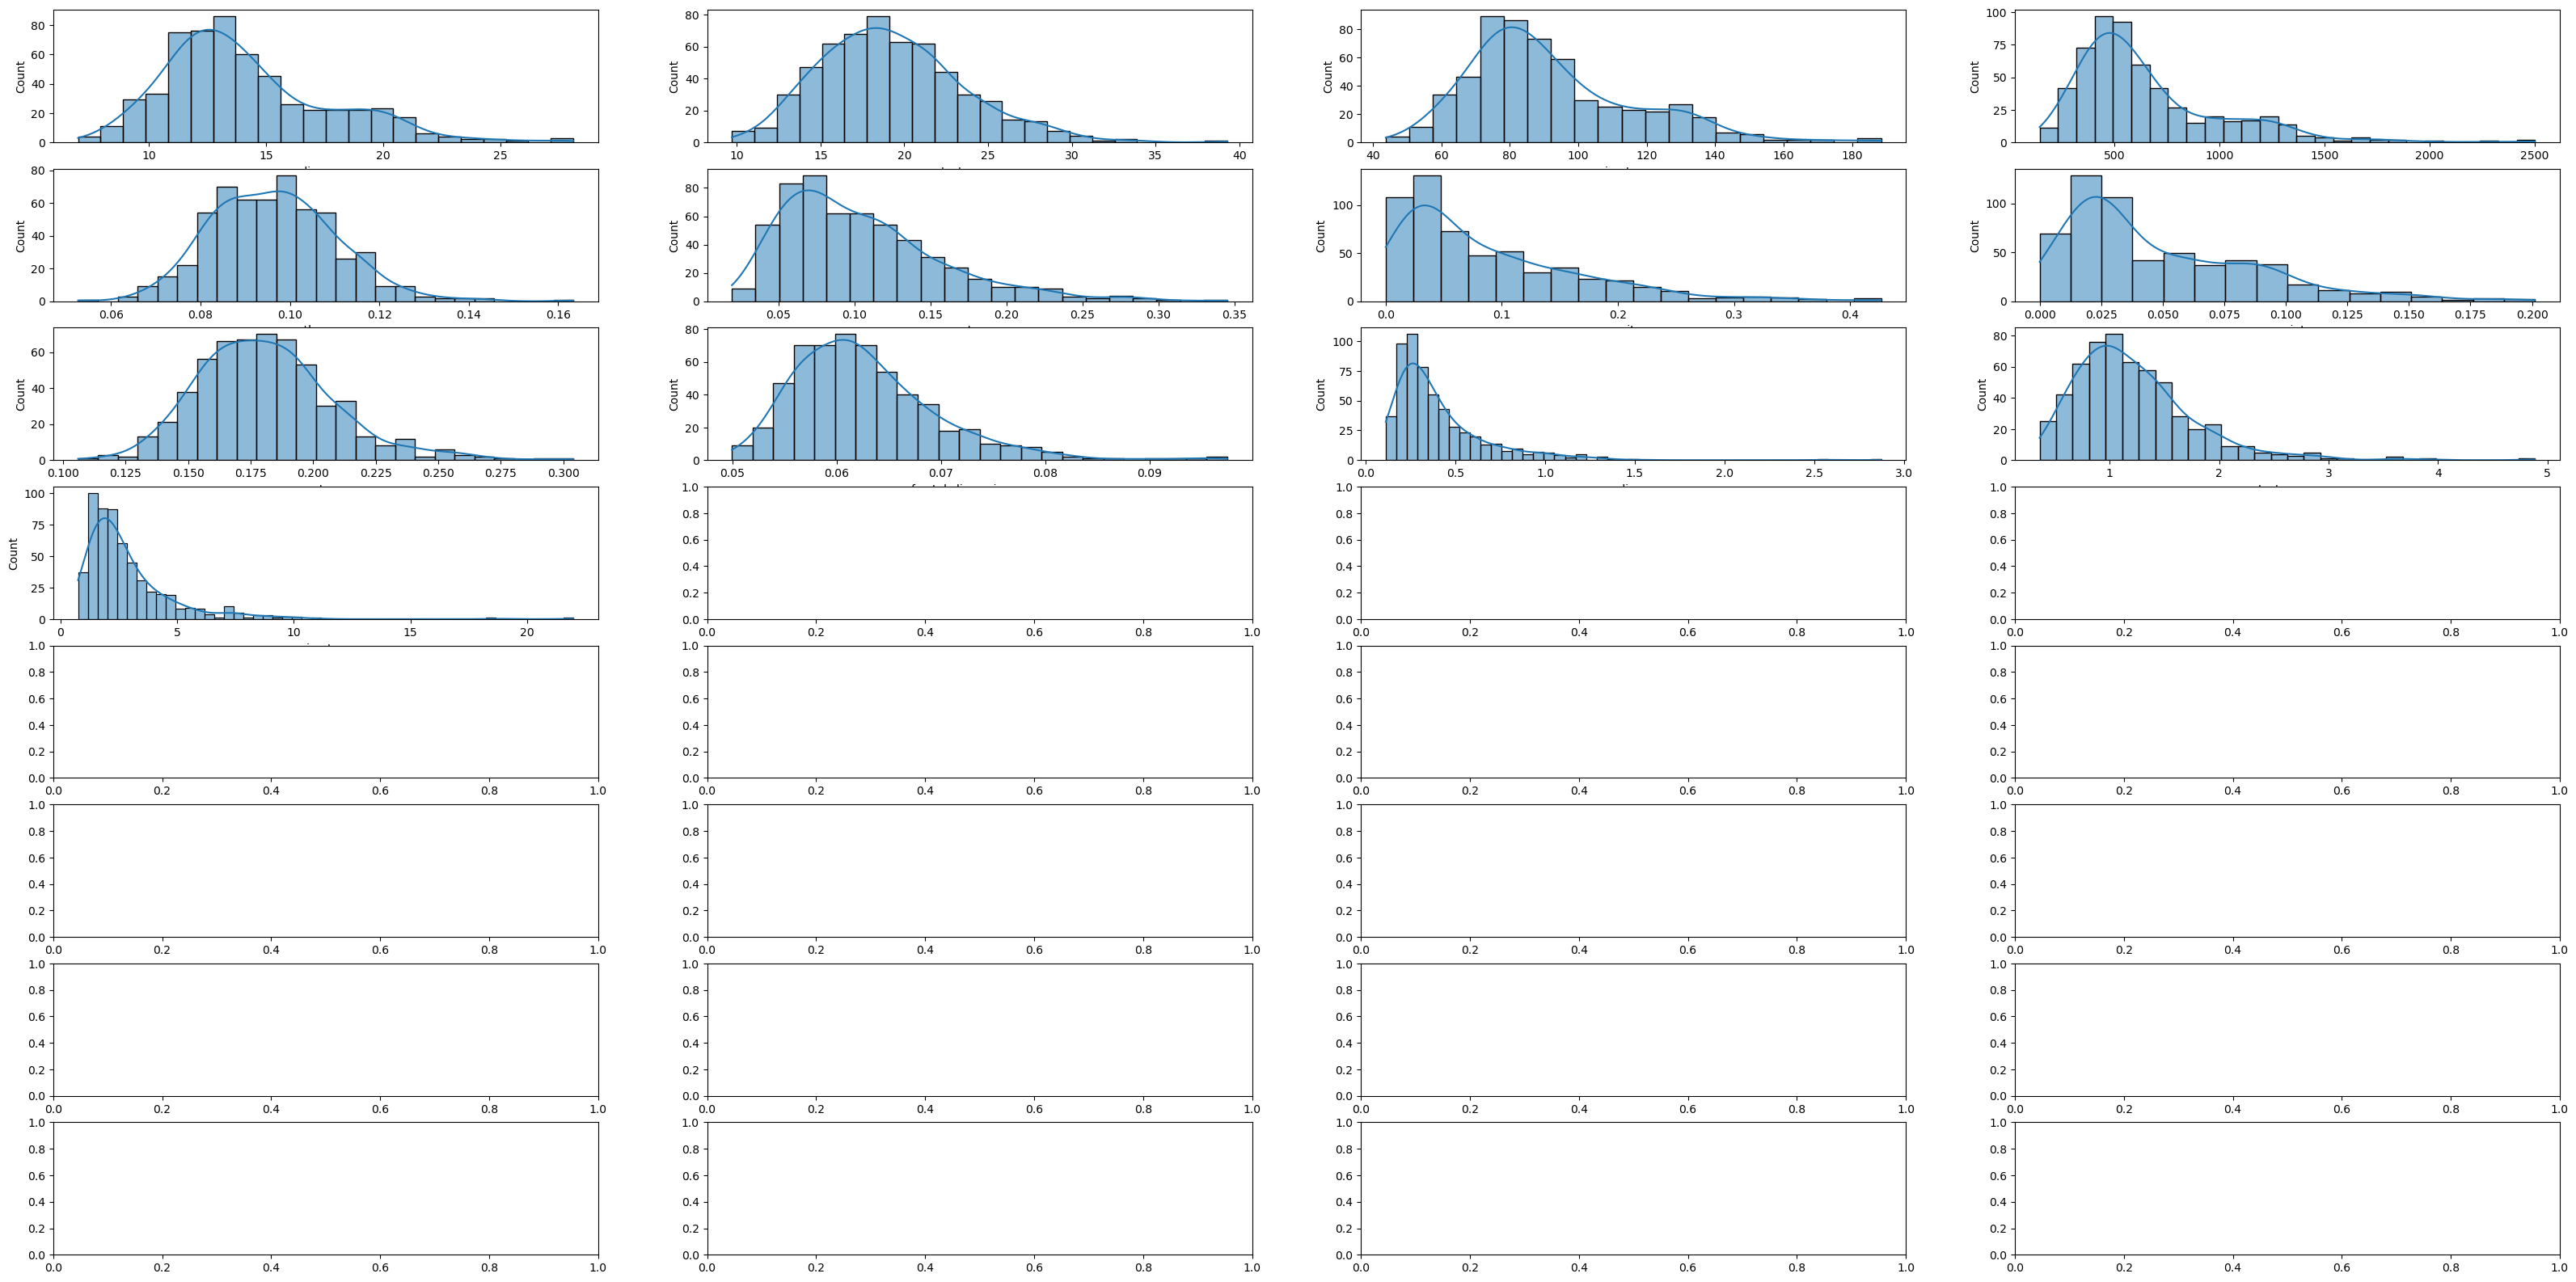

In [342]:
%matplotlib inline
fig,ax = plt.subplots(8,4, figsize=[40,20])
for i,col in enumerate(X) :
    sns.histplot(df[col], kde=True, ax=ax[i//4, i%4])

In [343]:
#Ada banyak outlier

In [344]:
Feature = df[X]
Target = df.diagnosis

In [345]:
X_train,X_test,y_train,y_test = train_test_split(Feature,Target,test_size=0.2,random_state=0)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((455, 13), (455,), (114, 13), (114,))

In [347]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [348]:
col = X_train.columns
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train = pd.DataFrame(X_train, columns=[col])
X_test = pd.DataFrame(X_test, columns=[col])

In [349]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se
0,0.145251,0.324481,0.142492,0.070965,0.522103,0.184508,0.058833,0.088221,0.419192,0.281171,0.054463,0.365718,0.048108
1,0.180747,0.509129,0.172759,0.091792,0.384273,0.130299,0.084677,0.069781,0.482828,0.206613,0.071048,0.278642,0.069877
2,0.433480,0.213693,0.418147,0.278473,0.459650,0.224745,0.128866,0.225050,0.340909,0.185131,0.046062,0.061218,0.045799
3,0.246060,0.337344,0.234953,0.130477,0.563376,0.175296,0.058341,0.146173,0.424242,0.345198,0.092196,0.254332,0.077887
4,0.249373,0.528216,0.237648,0.137010,0.318128,0.111705,0.040159,0.062674,0.244444,0.206403,0.040703,0.172118,0.038637
...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,0.559847,0.426141,0.532859,0.406575,0.397524,0.135128,0.187910,0.290408,0.247475,0.000000,0.078508,0.103386,0.075673
451,0.259312,0.594606,0.277659,0.140997,0.716520,0.754126,0.532568,0.424602,0.489899,0.683867,0.067391,0.273780,0.060406
452,0.116191,0.357261,0.110773,0.057306,0.524275,0.137593,0.063496,0.069881,0.225253,0.413437,0.143545,0.195987,0.118268
453,0.129632,0.353112,0.117062,0.061336,0.183230,0.013903,0.000000,0.000000,0.299495,0.305602,0.087778,1.000000,0.069406


In [350]:
#M=0, B=1
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [351]:
Model = LogisticRegression(solver='liblinear')
Model.fit(X_train,y_train)
print('Train', format(Model.score(X_train,y_train)))
print('Test', format(Model.score(X_test,y_test)))

Train 0.9274725274725275
Test 0.9298245614035088


In [352]:
y_test.shape, X_test.shape, y_train.shape,X_train.shape

((114,), (114, 13), (455,), (455, 13))

In [353]:
y_testp = Model.predict_proba(X_test)[:,1]
y_testp

array([0.60241001, 0.17766182, 0.13201988, 0.12960395, 0.08073687,
       0.10991649, 0.14787776, 0.05729015, 0.02213147, 0.0334601 ,
       0.50882535, 0.31451797, 0.0335329 , 0.36299634, 0.55054241,
       0.79324361, 0.19997019, 0.95838526, 0.94789798, 0.99486309,
       0.301266  , 0.84941502, 0.21433227, 0.08066279, 0.96558867,
       0.05103324, 0.02883839, 0.77880885, 0.09934178, 0.82305969,
       0.04754939, 0.83303917, 0.32267365, 0.67574772, 0.01740514,
       0.52798619, 0.12350838, 0.78267719, 0.20958188, 0.6763027 ,
       0.44063948, 0.04734442, 0.36638529, 0.03370792, 0.27447707,
       0.99445283, 0.01413981, 0.14982606, 0.06077898, 0.80288794,
       0.97414866, 0.84190697, 0.82597765, 0.07967128, 0.19278419,
       0.06050929, 0.08930871, 0.07149423, 0.08099796, 0.99106784,
       0.56300646, 0.68921721, 0.05788384, 0.09957461, 0.94737852,
       0.18205241, 0.99960636, 0.96539637, 0.97222891, 0.03937604,
       0.31973855, 0.8920882 , 0.08886221, 0.45269691, 0.94968

In [354]:
print(log_loss(y_test,y_testp)) #0

0.2139274724771239


C = 0.01 Train 0.8857142857142857, Test 0.8596491228070176
C = 1 Train 0.9736263736263736, Test 0.43859649122807015
C = 10 Train 0.9824175824175824, Test 0.42105263157894735
C = 100 Train 0.9868131868131869, Test 0.41228070175438597
C = 1000 Train 0.9868131868131869, Test 0.2894736842105263

In [356]:
c = [0.01,1,10,100,1000]
for i in c :
    Model = LogisticRegression(C=i, solver='liblinear',max_iter=1000)
    Model.fit(X_train,y_train)
    a = Model.score(X_train,y_train)
    b = Model.score(X_test,y_test)
    print(f'C = {i} Train {a}, Test {b}')

C = 0.01 Train 0.7142857142857143, Test 0.6754385964912281
C = 1 Train 0.9274725274725275, Test 0.9298245614035088
C = 10 Train 0.9538461538461539, Test 0.9473684210526315
C = 100 Train 0.9626373626373627, Test 0.9473684210526315
C = 1000 Train 0.9626373626373627, Test 0.9473684210526315


In [357]:
from sklearn.decomposition import PCA
pca = PCA()
X_train = pca.fit_transform(X_train)
pca.explained_variance_ratio_

array([5.58139491e-01, 1.94408930e-01, 1.00892131e-01, 4.13269095e-02,
       3.39568267e-02, 3.02876370e-02, 1.84985720e-02, 1.01478295e-02,
       6.89762745e-03, 4.08410762e-03, 7.49023979e-04, 5.93872125e-04,
       1.70421307e-05])

In [313]:
a = np.array([5.06067469e-01, 1.76693929e-01, 7.80782798e-02, 6.90676342e-02,
       4.35694456e-02, 3.54698881e-02, 1.48934038e-02, 1.31554917e-02,
       1.05010119e-02, 9.74950489e-03, 8.16804041e-03, 7.77295878e-03,
       6.64482199e-03, 5.62608972e-03, 2.62868581e-03, 2.49355564e-03,
       1.80740839e-03, 1.48718262e-03, 1.39036403e-03, 1.10352731e-03,
       9.50745667e-04, 7.49115325e-04, 5.58848308e-04, 4.25930930e-04,
       3.95669207e-04, 2.91312722e-04, 1.79254567e-04, 4.68435871e-05,
       2.87852057e-05, 4.80221106e-06])
np.cumsum(a)

array([0.50606747, 0.6827614 , 0.76083968, 0.82990731, 0.87347676,
       0.90894665, 0.92384005, 0.93699554, 0.94749655, 0.95724606,
       0.9654141 , 0.97318706, 0.97983188, 0.98545797, 0.98808665,
       0.99058021, 0.99238762, 0.9938748 , 0.99526517, 0.99636869,
       0.99731944, 0.99806855, 0.9986274 , 0.99905333, 0.999449  ,
       0.99974031, 0.99991957, 0.99996641, 0.9999952 , 1.        ])

In [315]:
pca = PCA(n_components=13)  # Gunakan 13 komponen utama
X_train_reduced = pca.fit_transform(X_train)

In [321]:
df[X].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [287]:
df[X].columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [288]:
df['texture_se']

0      0.9053
1      0.7339
2      0.7869
3      1.1560
4      0.7813
        ...  
564    1.2560
565    2.4630
566    1.0750
567    1.5950
568    1.4280
Name: texture_se, Length: 569, dtype: float64